In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Gaps or Unmet Needs in Digital Fitness Products:
        keyword   interest
2  home workout  13.932489
1      home gym  12.886640
Most In-Demand Digital Fitness Products/Services:
       keyword   interest
0  gym workout  15.831418


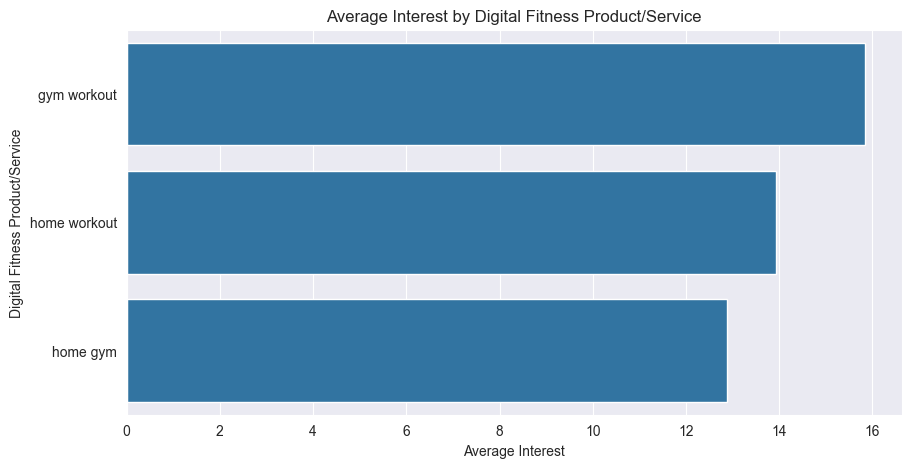

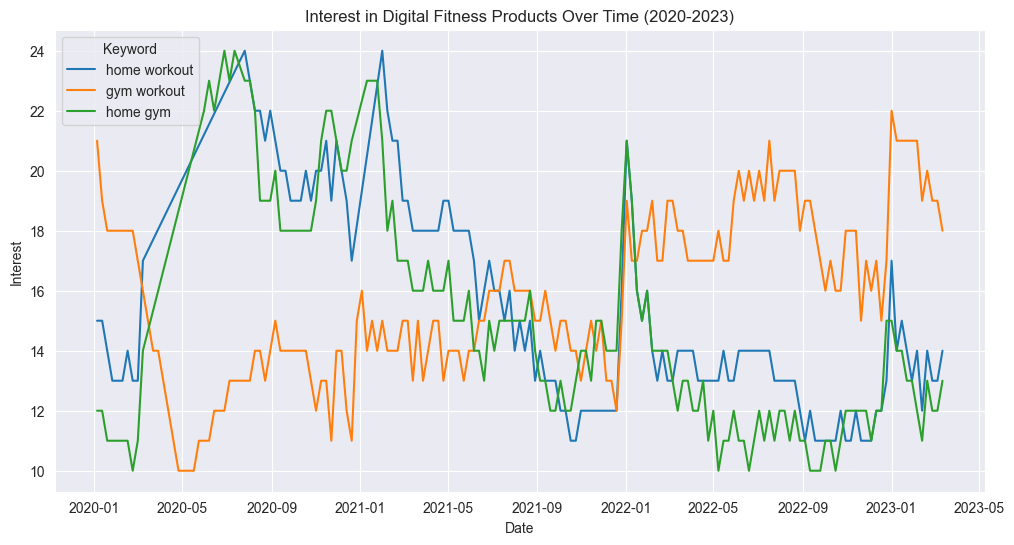

In [9]:
# Load the three_keywords dataset to identify gaps and in-demand products
three_keywords_df = pd.read_csv("data/three_keywords_clean.csv")

# Ensure 'week' column is datetime
three_keywords_df['week'] = pd.to_datetime(three_keywords_df['week'])

# Split 'region' into separate keyword and region columns
three_keywords_df[['keyword', 'region']] = three_keywords_df['region'].str.split(':', expand=True)

# 1. Identify Gaps or Unmet Needs
# Calculate the average interest for each keyword across the entire dataset
keyword_interest = three_keywords_df.groupby('keyword')['interest'].mean().reset_index()
keyword_interest = keyword_interest.sort_values(by='interest', ascending=False)

# Identify gaps by looking for keywords with lower average interest
low_interest_keywords = keyword_interest[keyword_interest['interest'] < keyword_interest['interest'].mean()]
print("Gaps or Unmet Needs in Digital Fitness Products:")
print(low_interest_keywords)

# 2. Determine Most In-Demand Digital Fitness Products/Services
high_interest_keywords = keyword_interest[keyword_interest['interest'] >= keyword_interest['interest'].mean()]
print("Most In-Demand Digital Fitness Products/Services:")
print(high_interest_keywords)

# Plot the average interest by keyword to visualize demand
plt.figure(figsize=(10, 5))
sns.barplot(data=keyword_interest, x='interest', y='keyword')
plt.title('Average Interest by Digital Fitness Product/Service')
plt.xlabel('Average Interest')
plt.ylabel('Digital Fitness Product/Service')
plt.show()

# 3. Propose Digital Platform Strategies
# Analyze recent trends to propose strategies for the fitness studio
recent_trends = three_keywords_df[three_keywords_df['week'] >= '2020-01-01']

plt.figure(figsize=(12, 6))
sns.lineplot(data=recent_trends, x='week', y='interest', hue='keyword')
plt.title('Interest in Digital Fitness Products Over Time (2020-2023)')
plt.xlabel('Date')
plt.ylabel('Interest')
plt.legend(title='Keyword')
plt.show()